<a href="https://colab.research.google.com/github/Sa-Fi/Crop-pest-and-disease-detection/blob/main/Image_Preprocessing_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/leaf-disease

100% 1.24G/1.25G [00:15<00:00, 120MB/s]
100% 1.25G/1.25G [00:15<00:00, 85.5MB/s]


In [ ]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

Resizing image

In [ ]:
def resizing_image(image_path,width,height):
  image = cv2.imread(image_path)
  resized_image = cv2.resize(image, (width, height))

  return resized_image



In [ ]:
image_path = '/content/CCMT Dataset/Cashew/anthracnose/anthracnose1000_.jpg'
image = cv2.imread(image_path)
height,width,channels = image.shape
data_type = image.dtype
print(f"Image Shape: {height} x {width} pixels, {channels} channels")
print(f"Data Type: {data_type}")
print("After resizing image")

resized_img = resizing_image(image_path,150,150)
height,width,channels = resized_img.shape
data_type = resized_img.dtype
print(f"Image Shape after resize: {height} x {width} pixels, {channels} channels")
print(f"Data Type after resize: {data_type}")

Image Shape: 400 x 400 pixels, 3 channels
Data Type: uint8
After resizing image
Image Shape after resize: 150 x 150 pixels, 3 channels
Data Type after resize: uint8


Normalize image

In [ ]:
def normalize_image(image_data):

    image_data = np.array(image_data, dtype=np.float32)

    # Normalize the pixel values to the range [0, 1]
    image_data /= 255.0
    return image_data

In [ ]:
image_path = '/content/CCMT Dataset/Cashew/anthracnose/anthracnose1000_.jpg'
image = cv2.imread(image_path)
normalized_img = normalize_image(image)
print("Before normalizing",image)
print(normalized_img)

Before normalizing [[[229 226 228]
  [225 224 228]
  [226 226 232]
  ...
  [244 241 243]
  [244 241 243]
  [244 241 243]]

 [[228 227 229]
  [226 225 229]
  [223 225 233]
  ...
  [245 242 244]
  [245 242 244]
  [244 241 243]]

 [[228 229 233]
  [224 227 231]
  [220 223 231]
  ...
  [246 243 245]
  [246 243 245]
  [244 241 243]]

 ...

 [[245 238 235]
  [245 238 235]
  [245 238 235]
  ...
  [245 240 237]
  [245 240 237]
  [245 240 237]]

 [[245 238 235]
  [245 238 235]
  [245 238 235]
  ...
  [245 240 237]
  [245 240 237]
  [245 240 237]]

 [[244 237 234]
  [244 237 234]
  [245 238 235]
  ...
  [244 239 236]
  [245 240 237]
  [245 240 237]]]
[[[0.8980392  0.8862745  0.89411765]
  [0.88235295 0.8784314  0.89411765]
  [0.8862745  0.8862745  0.9098039 ]
  ...
  [0.95686275 0.94509804 0.9529412 ]
  [0.95686275 0.94509804 0.9529412 ]
  [0.95686275 0.94509804 0.9529412 ]]

 [[0.89411765 0.8901961  0.8980392 ]
  [0.8862745  0.88235295 0.8980392 ]
  [0.8745098  0.88235295 0.9137255 ]
  ...
  [0

Removing Noise

In [ ]:
def remove_noise(image_path):
  image = resizing_image(image_path,150,150)
  blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
  return blurred_image

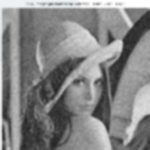

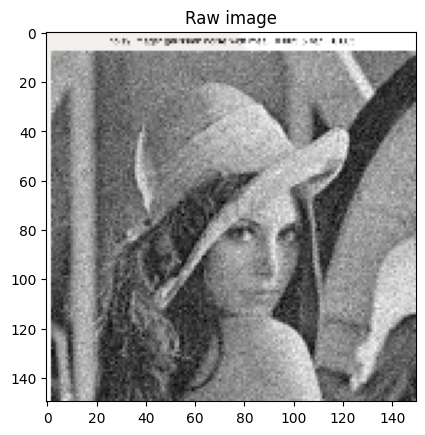

In [ ]:
image_path = '/content/noise image.png'

plt.imshow(resizing_image(image_path,150,150))
plt.title("Raw image")
denoised_img = remove_noise(image_path)
cv2_imshow(denoised_img)

RGB to Gray Conversion

In [ ]:
def rgb2gray(image):
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

  return gray_image


Raw image


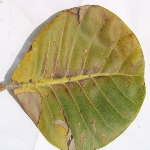

Graysclaced Image


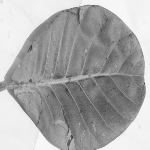

In [ ]:
image_path = '/content/CCMT Dataset/Cashew/anthracnose/anthracnose1000_.jpg'
image = resizing_image(image_path,150,150)
print("Raw image")
cv2_imshow(image)
gray_image = rgb2gray(image)
print("Graysclaced Image")
cv2_imshow(gray_image)

Thresholding

In [ ]:
def thresholding(image):
  _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
  return binary_image

Raw image


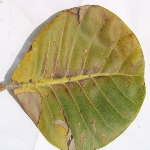

thresholded image


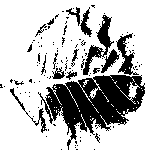

In [ ]:
image_path = '/content/CCMT Dataset/Cashew/anthracnose/anthracnose1000_.jpg'
image = resizing_image(image_path,150,150)
print("Raw image")
cv2_imshow(image)
gray_image = rgb2gray(image)
thresholding_img = thresholding(gray_image)
print("thresholded image")
cv2_imshow(thresholding_img)

GrabCut method for segmentation

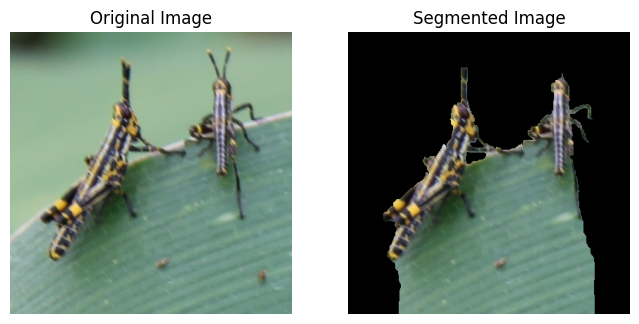

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def grabcut_segmentation(image, rect):
    """
    Perform GrabCut segmentation on an input image.

    Args:
        image (numpy.ndarray): The input image.
        rect (tuple): A rectangle (x, y, width, height) specifying the region of interest (ROI).

    Returns:
        numpy.ndarray: The segmented image.
    """
    # Create a mask for initialization (0 for background, 1 for foreground)
    mask = np.zeros(image.shape[:2], np.uint8)

    # Initialize the background and foreground models
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Apply GrabCut
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to obtain the final result
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiply the image with the mask to get the segmented result
    segmented_image = image * mask2[:, :, np.newaxis]

    return segmented_image

# Load an image
image = cv2.imread('/content/CCMT Dataset/Maize/grasshoper/grasshoper103_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 400)  # Format: (x, y, width, height)

# Perform GrabCut segmentation
segmented_result = grabcut_segmentation(image, roi_rect)

# Display the original image and the segmented result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()


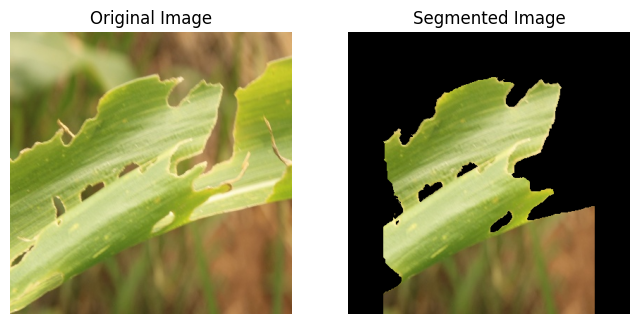

In [ ]:
image = cv2.imread('/content/CCMT Dataset/Maize/fall armyworm/fall armyworm101_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 400)  # Format: (x, y, width, height)

# Perform GrabCut segmentation
segmented_result = grabcut_segmentation(image, roi_rect)

# Display the original image and the segmented result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()


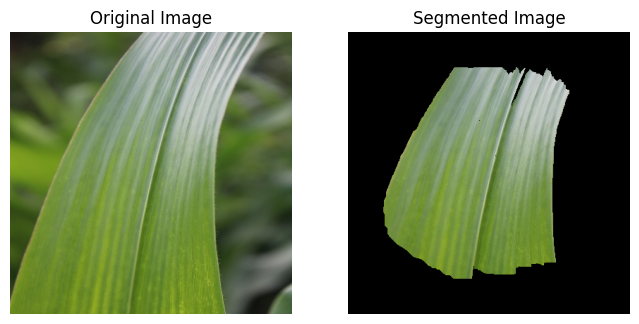

In [ ]:
image = cv2.imread('/content/CCMT Dataset/Maize/healthy/healthy102_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 300)  # Format: (x, y, width, height)

# Perform GrabCut segmentation
segmented_result = grabcut_segmentation(image, roi_rect)

# Display the original image and the segmented result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()

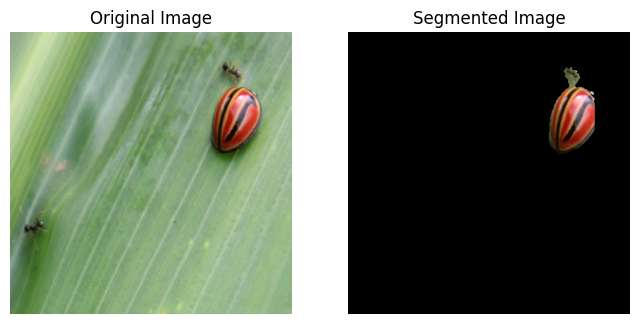

In [ ]:
image = cv2.imread('/content/CCMT Dataset/Maize/leaf beetle/leaf beetle103_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 300)  # Format: (x, y, width, height)


segmented_result = grabcut_segmentation(image, roi_rect)


plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()

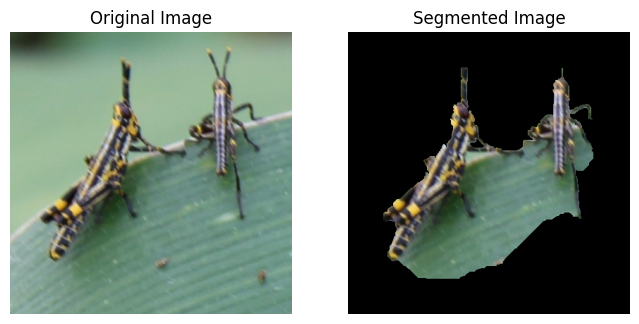

In [ ]:
image = cv2.imread('/content/CCMT Dataset/Maize/grasshoper/grasshoper103_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 300)  # Format: (x, y, width, height)

# Perform GrabCut segmentation
segmented_result = grabcut_segmentation(image, roi_rect)

# Display the original image and the segmented result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()

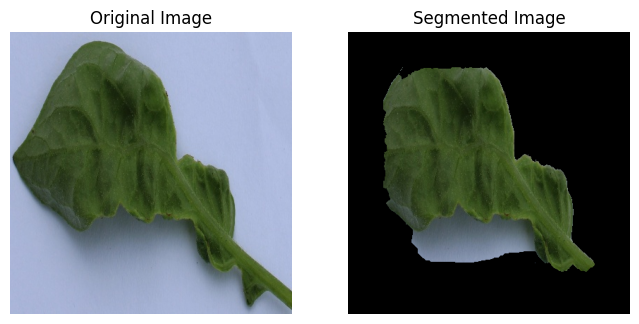

In [ ]:
image = cv2.imread('/content/CCMT Dataset/Tomato/leaf curl/leaf curl104_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 300)  # Format: (x, y, width, height)

# Perform GrabCut segmentation
segmented_result = grabcut_segmentation(image, roi_rect)

# Display the original image and the segmented result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()

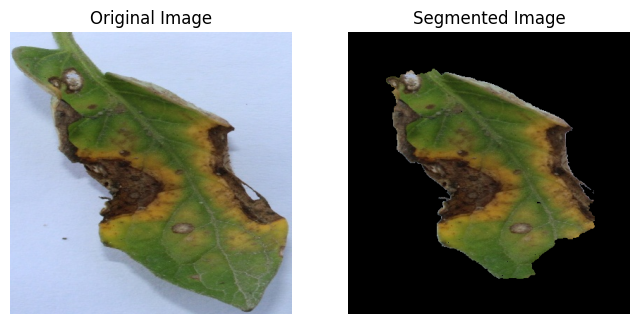

In [ ]:
image = cv2.imread('/content/CCMT Dataset/Tomato/verticulium wilt/leaf blight915_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 300)  # Format: (x, y, width, height)

# Perform GrabCut segmentation
segmented_result = grabcut_segmentation(image, roi_rect)

# Display the original image and the segmented result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()

Sharpening

Raw image


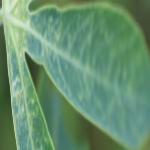

Sharpe Image


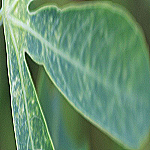

In [ ]:
def apply_image_sharpening(image):
    # Define the sharpening kernel (Laplacian kernel)
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]], dtype=np.float32)

    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image


# image = cv2.imread('/content/green mite849_.jpg')
image = resizing_image('/content/green mite849_.jpg',150,150)
# Apply image sharpening
sharpened_image = apply_image_sharpening(image)

# Display the original and sharpened images
print("Raw image")
cv2_imshow(image)
print("Sharpe Image")
cv2_imshow(sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Removing Blur

In [ ]:
from scipy.signal import convolve2d
from scipy.signal.signaltools import wiener

def deblur_image(image, kernel):
    # Convert the image to grayscale (assuming it's a color image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform deconvolution using Wiener deconvolution
    deblurred_image = wiener(gray_image, kernel)
    rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    return rgb_image



<ipython-input-101-7ed8ee8f96c1>:2: DeprecationWarning: Please use `wiener` from the `scipy.signal` namespace, the `scipy.signal.signaltools` namespace is deprecated.
  from scipy.signal.signaltools import wiener


Raw Image


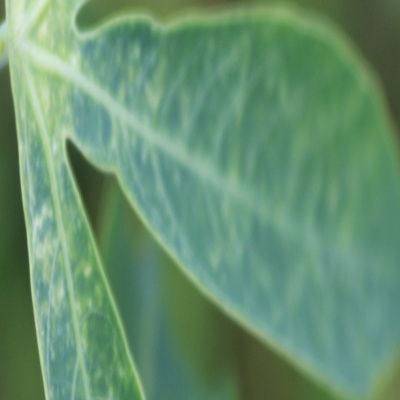

Deblur image


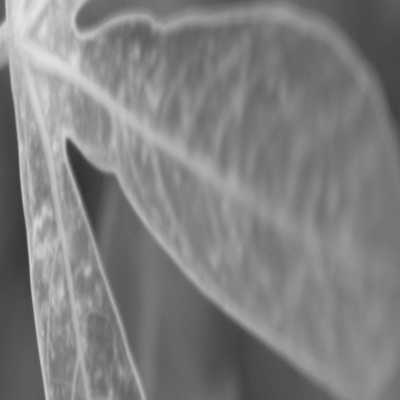

In [ ]:

# image = cv2.imread('/content/green mite849_.jpg')
resizing_image('/content/green mite849_.jpg',150,150)
# Adjust the kernel size based on the blur you want to remove
kernel_size = 5

# Deblur the image
restored_image = deblur_image(image, kernel_size)

# Display the original and deblurred images
print("Raw Image")
cv2_imshow( image)
print("Deblur image")
cv2_imshow( restored_image)